In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import copy
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

In [2]:
dt = pd.read_csv(r"C:\Users\DEEPAK YADAV\Downloads\data2.csv")
dt.head()

,Time,Total arrivals
0,Jan-1976,203000
1,Feb-1976,137000
2,Mar-1976,119000
3,Apr-1976,102100
4,May-1976,129000


In [3]:
dt['Time'] = pd.to_datetime(dt.Time)

In [4]:
dt.set_index('Time',inplace = True)

In [5]:
dt.tail()

,Total arrivals
Time,
2018-08-01,1718600
2018-09-01,1722000
2018-10-01,1963700
2018-11-01,1668000
2018-12-01,1853600


<Axes: xlabel='Time'>

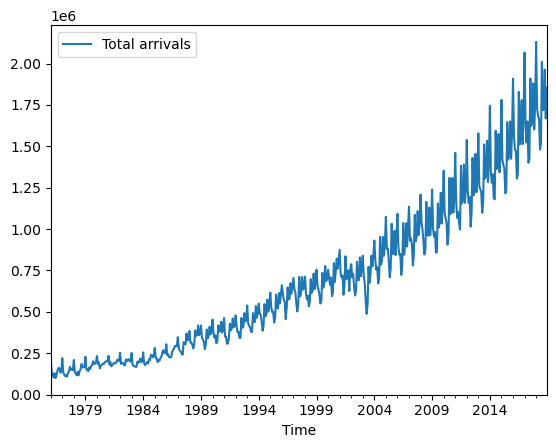

In [6]:
dt.plot()

In [7]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dt,test_size=0.3,shuffle = False)

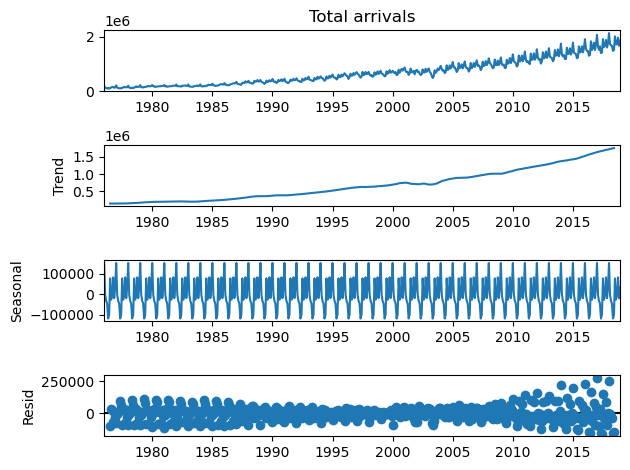

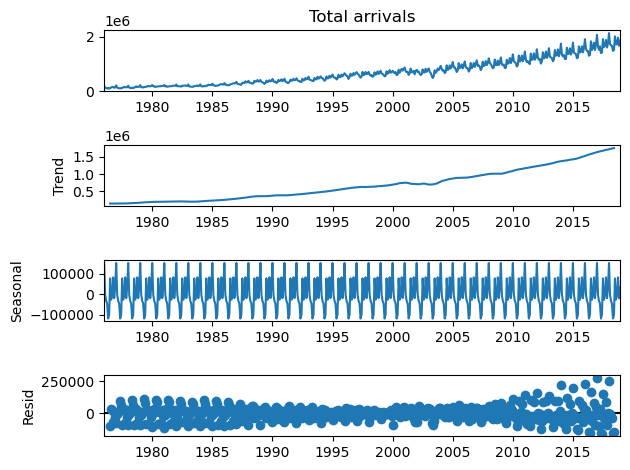

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dt['Total arrivals'])
result.plot()

In [9]:
# test.head()
len(dt)

516

In [10]:
# print(train.size)
# print(test.size)
from statsmodels.tsa.stattools import adfuller
#H0 - not stationary
#H1 = stationary
def adfuller_test(sales):
    result = adfuller(sales, autolag='AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adfuller_test(dt['Total arrivals'])

ADF Test Statistic : 3.5427813937893218
p-value : 1.0
#Lags Used : 14
Number of Observations Used : 501
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
# train.plot()
train = dt.iloc[:500]
test = dt.iloc[500:]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [12]:
# test.plot()# use time series generator , make multiple inputs give single output
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [13]:
n_input = 12
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [14]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:

# fit model
model.fit(generator,epochs=50)

Epoch 1/50

488/488 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 2/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0032
Epoch 3/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0034
Epoch 4/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0034
Epoch 5/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0032
Epoch 6/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0033
Epoch 7/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0032
Epoch 8/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0030
Epoch 9/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0027
Epoch 10/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0021
Epoch 11/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0018
Epoch 12/50
488/488 [==============================] - 2s 5ms/step - loss: 0.0017
Epoch 13/50
488/488 [===

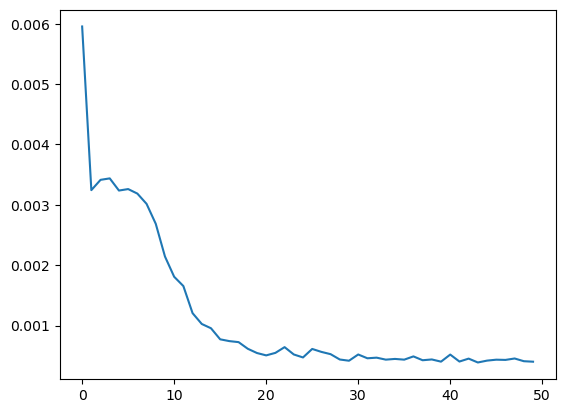

In [17]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [18]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

model.predict(last_train_batch)

1/1 [==============================] - 0s 275ms/step


array([[0.79646957]], dtype=float32)

In [19]:
scaled_test[0]

array([0.79644982])

In [20]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 29ms/step


In [21]:

test_predictions

[array([0.79646957], dtype=float32),
 array([0.89307135], dtype=float32),
 array([0.75524545], dtype=float32),
 array([0.86606604], dtype=float32),
 array([1.060158], dtype=float32),
 array([0.81568575], dtype=float32),
 array([0.76393414], dtype=float32),
 array([0.82402474], dtype=float32),
 array([0.69628304], dtype=float32),
 array([0.70689076], dtype=float32),
 array([0.969713], dtype=float32),
 array([0.81014615], dtype=float32),
 array([0.8408513], dtype=float32),
 array([0.9355753], dtype=float32),
 array([0.7946885], dtype=float32),
 array([0.9148678], dtype=float32)]

In [22]:
test.head()

,Total arrivals
Time,
2017-09-01,1666100
2017-10-01,1879600
2017-11-01,1602200
2017-12-01,1755100
2018-01-01,2130700


In [23]:

true_predictions = scaler.inverse_transform(test_predictions)

In [24]:

test['Predictions'] = true_predictions

<Axes: xlabel='Time'>

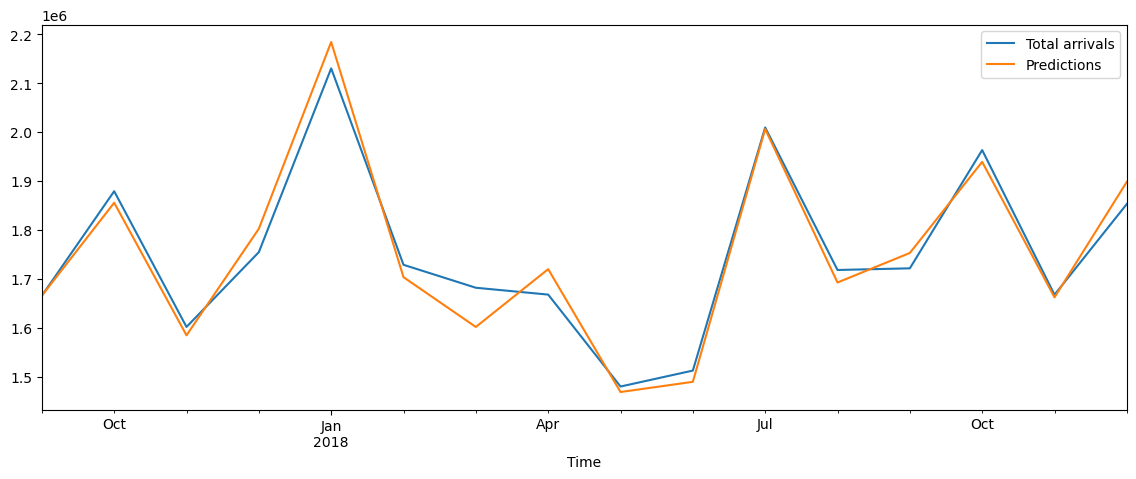

In [25]:
test.plot(figsize=(14,5))

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Total arrivals'],test['Predictions']))
print(rmse)
print(test.mean())

36031.617947041384
Total arrivals    1.752669e+06
Predictions       1.752175e+06
dtype: float64


In [27]:
predictions = []

first_eval_batch = scaled_test[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(48):  #4 years
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [28]:
predictions

[array([1.1016413], dtype=float32),
 array([0.86834085], dtype=float32),
 array([0.84994745], dtype=float32),
 array([0.8349015], dtype=float32),
 array([0.7395738], dtype=float32),
 array([0.75600344], dtype=float32),
 array([1.0315546], dtype=float32),
 array([0.8603628], dtype=float32),
 array([0.8734419], dtype=float32),
 array([0.99589884], dtype=float32),
 array([0.83925486], dtype=float32),
 array([0.94429255], dtype=float32),
 array([1.198084], dtype=float32),
 array([0.9094242], dtype=float32),
 array([0.90087926], dtype=float32),
 array([0.8738862], dtype=float32),
 array([0.780169], dtype=float32),
 array([0.79612184], dtype=float32),
 array([1.1083194], dtype=float32),
 array([0.8986076], dtype=float32),
 array([0.92908365], dtype=float32),
 array([1.048527], dtype=float32),
 array([0.8850714], dtype=float32),
 array([1.0032343], dtype=float32),
 array([1.3748076], dtype=float32),
 array([0.9483732], dtype=float32),
 array([0.962399], dtype=float32),
 array([0.9122853], dty

In [29]:
real_predictions = scaler.inverse_transform(predictions)

In [30]:
# real_predictions

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates=[dt.index[-1]+ DateOffset(months=x)for x in range(0,49)]

In [32]:
future_dates_dt = pd.DataFrame(index = future_dates[1:], columns=dt.columns)
dt.tail()

,Total arrivals
Time,
2018-08-01,1718600
2018-09-01,1722000
2018-10-01,1963700
2018-11-01,1668000
2018-12-01,1853600


In [33]:
# future_dates_dt # years

In [34]:
future_dates_dt['Total arrivals'] = real_predictions

<Axes: >

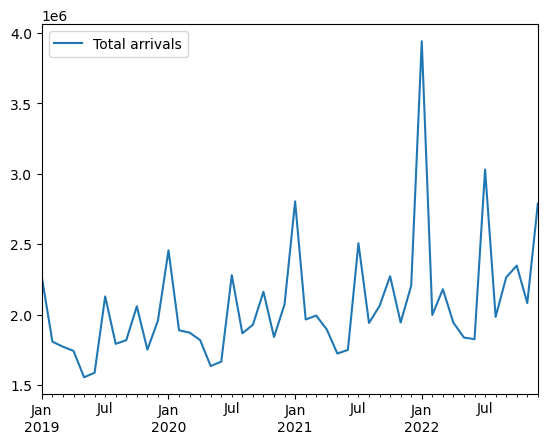

In [35]:
future_dates_dt.plot()

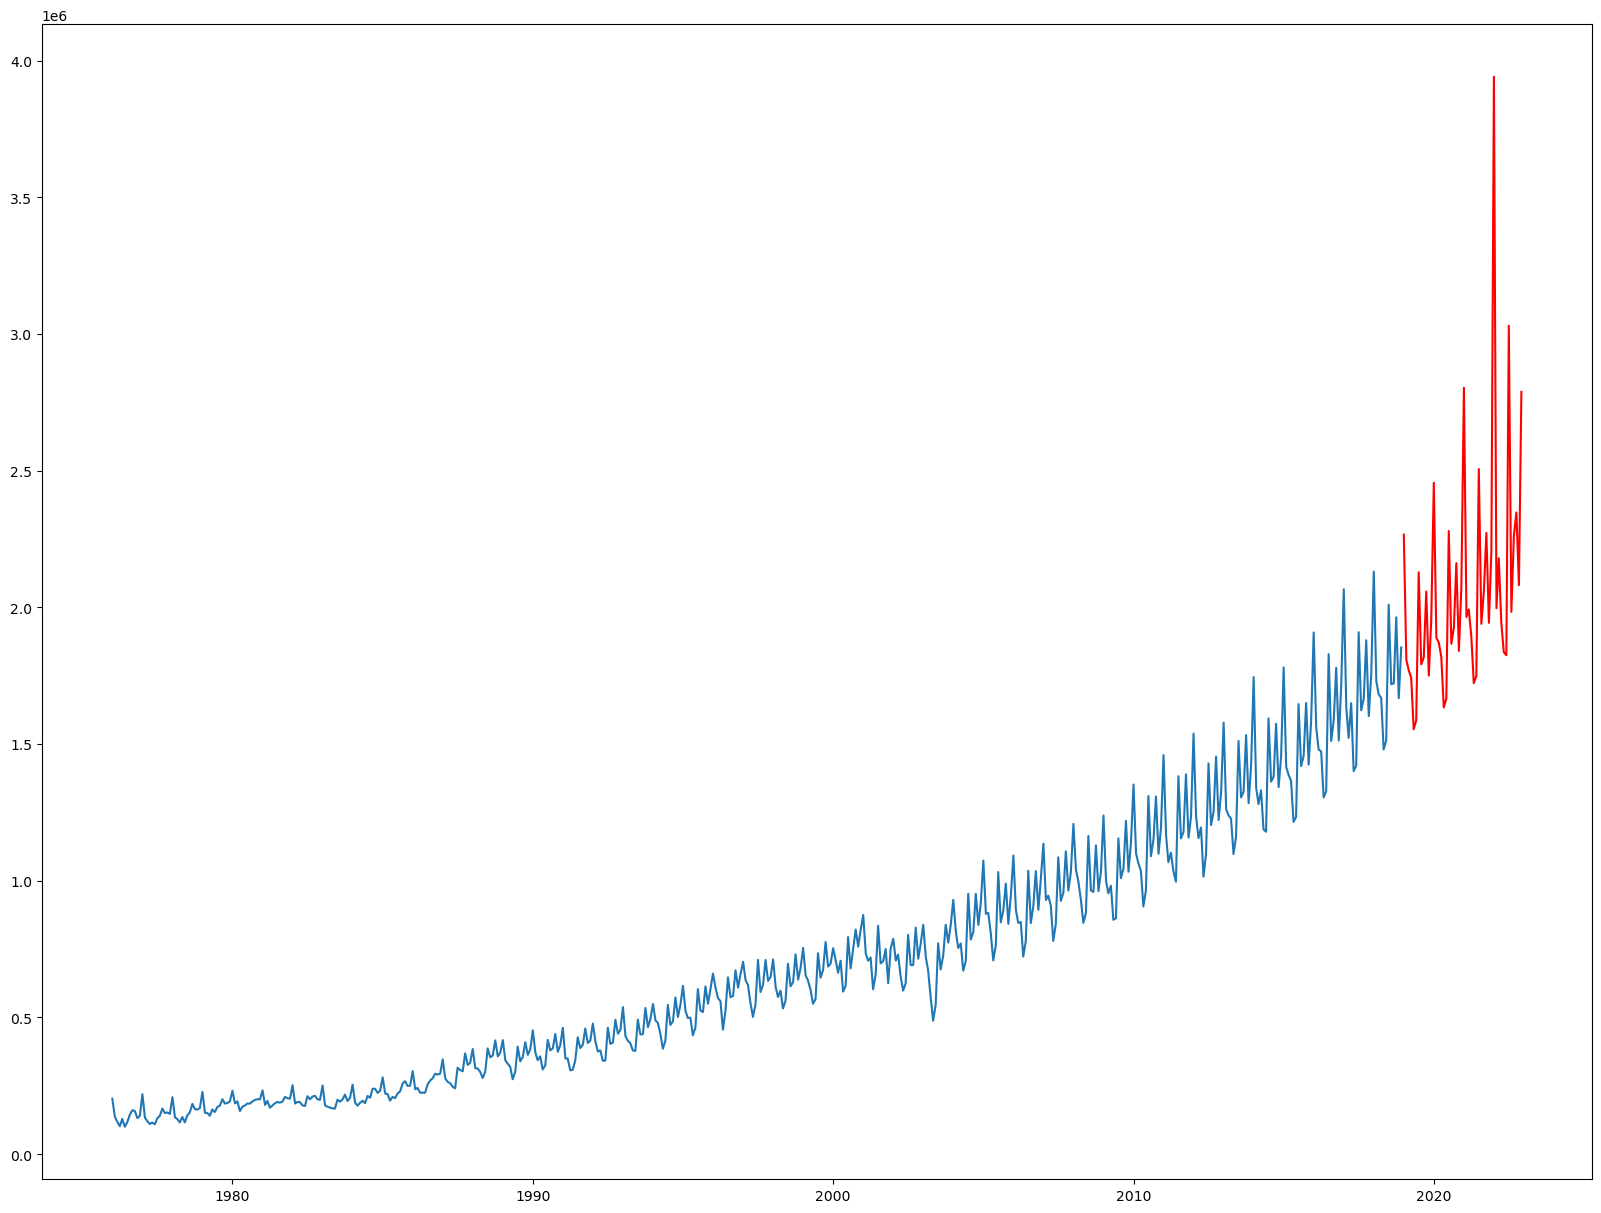

In [38]:
plt.figure(figsize=(20,15))
plt.plot(dt)
# final_dt = pd.concat([dt,future_dates_dt])
plt.plot(future_dates_dt,color='red')

plt.show()
# future_date
# future_dates_dt.head()

In [69]:
dt.head()

,Total arrivals
Time,
1976-01-01,203000
1976-02-01,137000
1976-03-01,119000
1976-04-01,102100
1976-05-01,129000
